## Business case : Yulu hypothesis testing

# About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


# How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands.

## Concept Used:

Bi-Variate Analysis

2-sample t-test: testing for difference across populations

ANNOVA

Chi-square

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm,t
from scipy.stats import poisson, expon,geom, ttest_1samp, ttest_ind,ttest_ind_from_stats
from scipy.stats import shapiro, levene, kruskal, chi2, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing.csv to bike_sharing (1).csv


In [6]:
df=pd.read_csv("bike_sharing.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


from matplotlib import pyplot as plt
_df_0['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['atemp'].plot(kind='hist', bins=20, title='atemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['casual'].plot(kind='hist', bins=20, title='casual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('datetime').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='temp', y='atemp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='atemp', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='humidity', y='casual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='casual', y='registered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['temp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('temp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['atemp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('atemp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['humidity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('humidity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['casual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('datetime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('datetime')):
  _plot_series(series, series_name, i)
  fig.legend(title='datetime', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('datetime')
_ = plt.ylabel('casual')

from matplotlib import pyplot as plt
_df_13['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['atemp'].plot(kind='line', figsize=(8, 4), title='atemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['humidity'].plot(kind='line', figsize=(8, 4), title='humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['casual'].plot(kind='line', figsize=(8, 4), title='casual')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='temp', y='datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='atemp', y='datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='humidity', y='datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['datetime'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='casual', y='datetime', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
df.shape

(10886, 12)

In [8]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


coverting datetime from object to string

In [10]:
df["datetime"]=pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


conerting the catagorical variable to catagory type

In [11]:
df["season"]=df["season"].astype("object")
df["holiday"]=df["holiday"].astype("object")
df["workingday"]=df["workingday"].astype("object")
df["weather"]=df["weather"].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [12]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [13]:
df.describe(include="object")

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [14]:
df.describe(include="datetime")

,datetime
count,10886
mean,2011-12-27 05:56:22.399411968
min,2011-01-01 00:00:00
25%,2011-07-02 07:15:00
50%,2012-01-01 20:30:00
75%,2012-07-01 12:45:00
max,2012-12-19 23:00:00


<ipython-input-15-6c3c42a9960d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["temp"])


<Axes: xlabel='temp', ylabel='Density'>

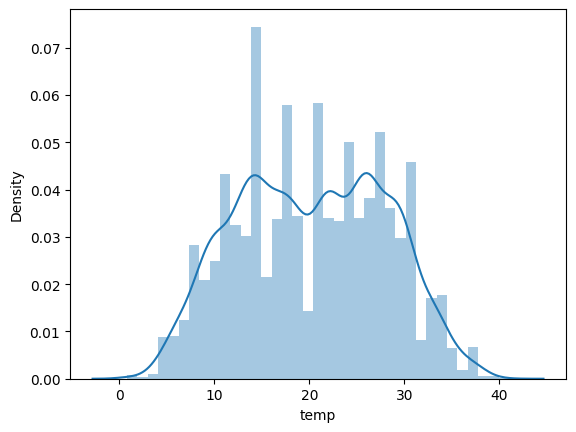

In [15]:
sns.distplot(df["temp"])

<ipython-input-16-39db36f7a75a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["atemp"])


<Axes: xlabel='atemp', ylabel='Density'>

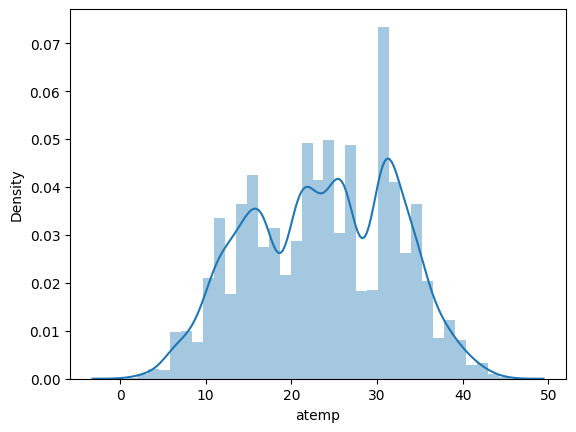

In [16]:
sns.distplot(df["atemp"])

<ipython-input-17-7ebd5086dfed>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["humidity"])


<Axes: xlabel='humidity', ylabel='Density'>

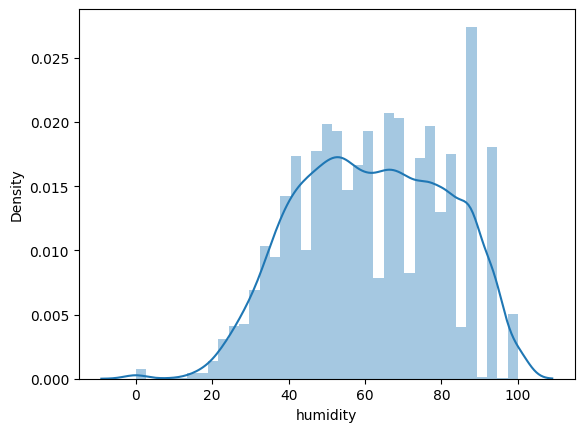

In [17]:
sns.distplot(df["humidity"])

<ipython-input-18-a76a2a88274a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["windspeed"])


<Axes: xlabel='windspeed', ylabel='Density'>

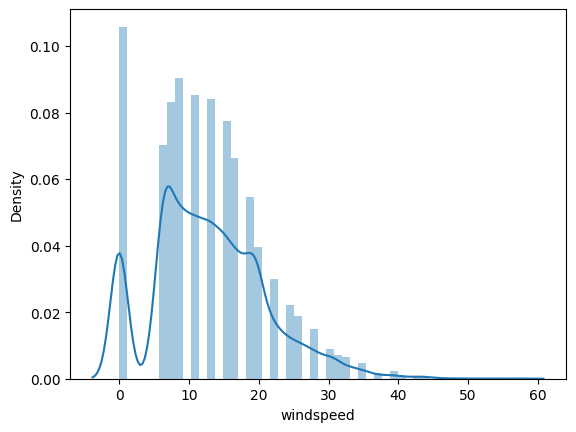

In [18]:
sns.distplot(df["windspeed"])

<ipython-input-20-5a4bcecd5f12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["casual"])


<Axes: xlabel='casual', ylabel='Density'>

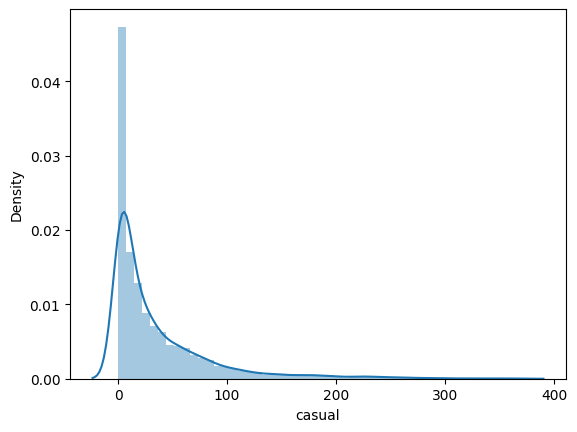

In [20]:
sns.distplot(df["casual"])

<ipython-input-21-d7c56ef23e2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["registered"])


<Axes: xlabel='registered', ylabel='Density'>

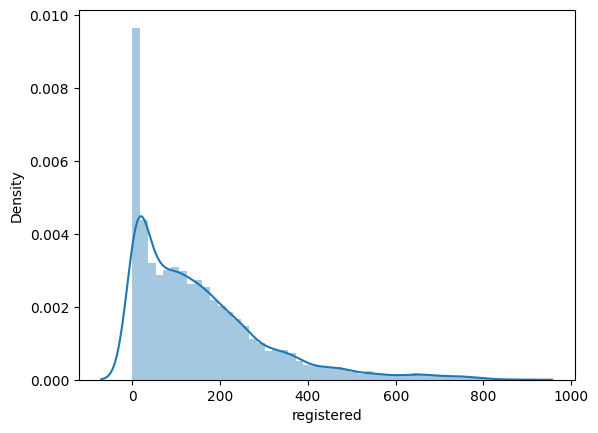

In [21]:
sns.distplot(df["registered"])

<ipython-input-22-c65c5e7cd500>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["count"])


<Axes: xlabel='count', ylabel='Density'>

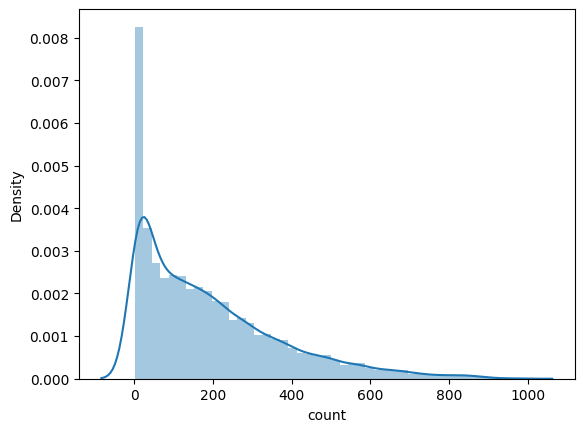

In [22]:
sns.distplot(df["count"])

<Axes: xlabel='temp', ylabel='Count'>

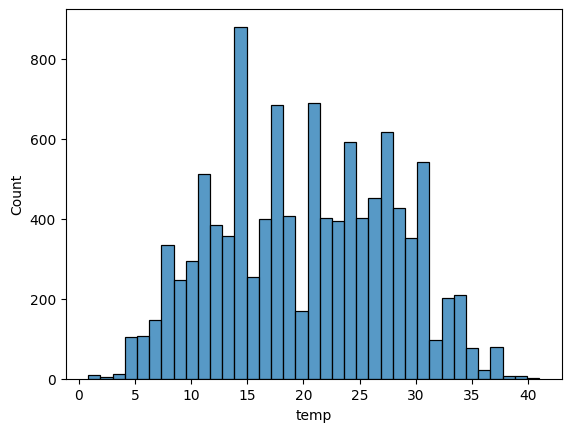

In [23]:
sns.histplot(df["temp"])

<Axes: xlabel='atemp', ylabel='Count'>

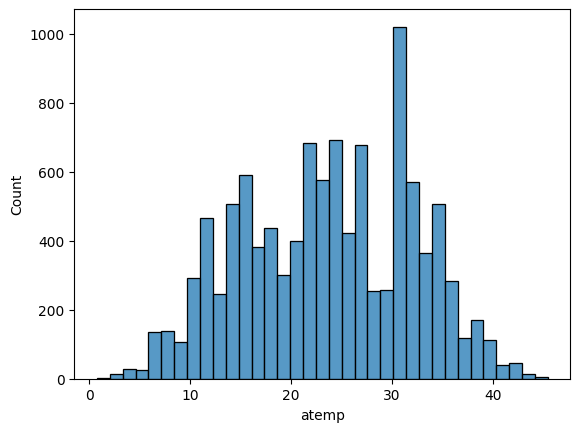

In [24]:
sns.histplot(df["atemp"])

<Axes: xlabel='humidity', ylabel='Count'>

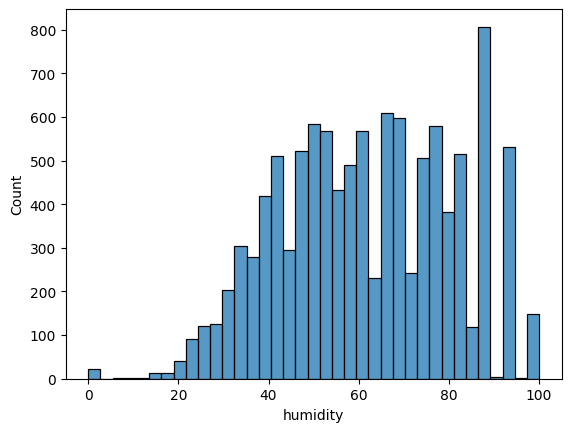

In [25]:
sns.histplot(df["humidity"])

<Axes: xlabel='windspeed', ylabel='Count'>

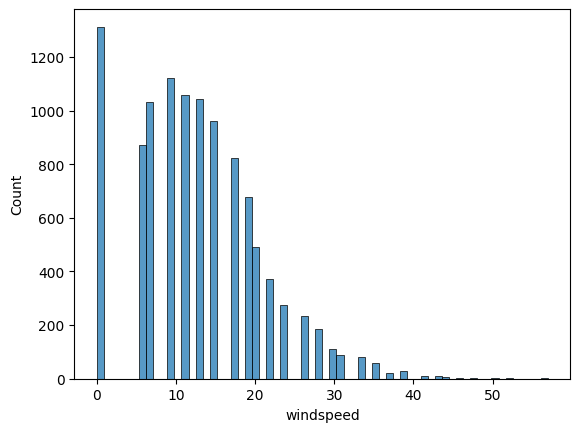

In [26]:
sns.histplot(df["windspeed"])

<Axes: xlabel='casual', ylabel='Count'>

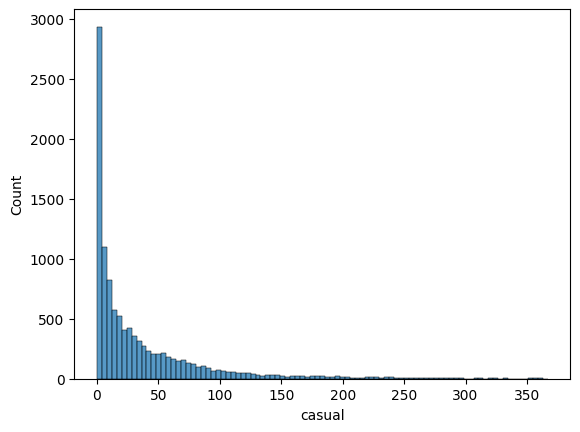

In [27]:
sns.histplot(df["casual"])

<Axes: xlabel='registered', ylabel='Count'>

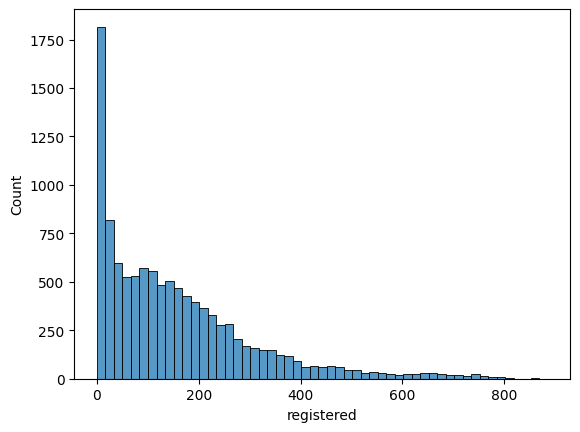

In [28]:
sns.histplot(df["registered"])

<Axes: xlabel='count', ylabel='Count'>

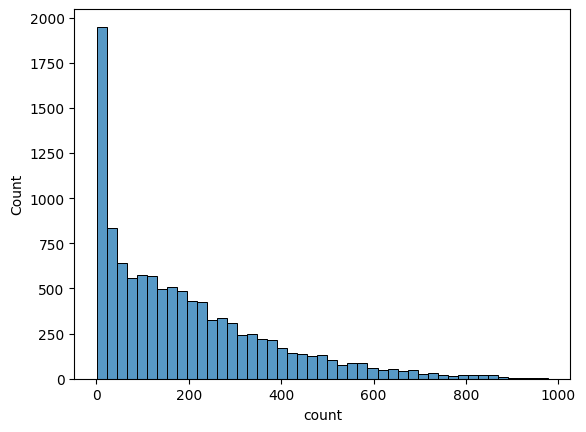

In [29]:
sns.histplot(df["count"])

<Axes: ylabel='temp'>

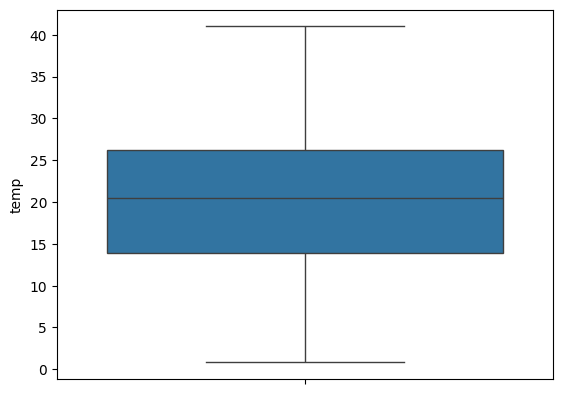

In [30]:
sns.boxplot(df["temp"])

<Axes: ylabel='atemp'>

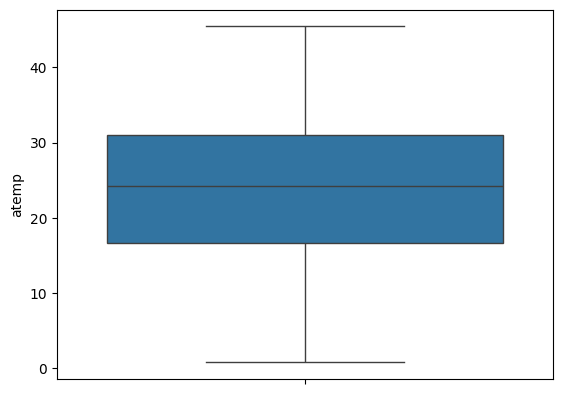

In [31]:
sns.boxplot(df["atemp"])

<Axes: ylabel='humidity'>

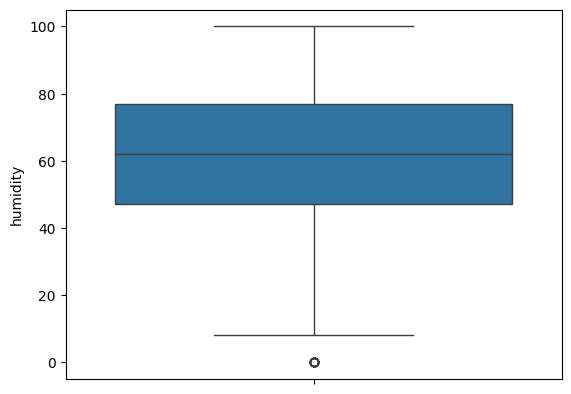

In [32]:
sns.boxplot(df["humidity"])

<Axes: ylabel='windspeed'>

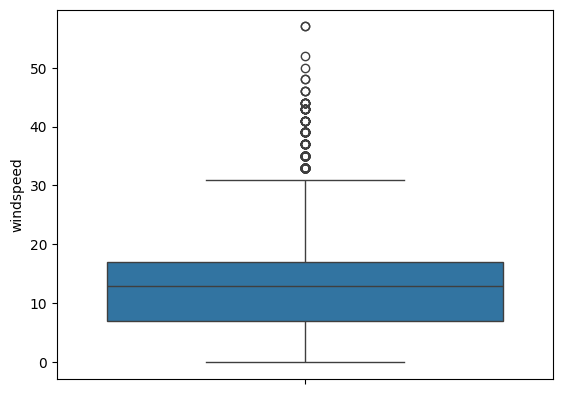

In [33]:
sns.boxplot(df["windspeed"])

<Axes: ylabel='registered'>

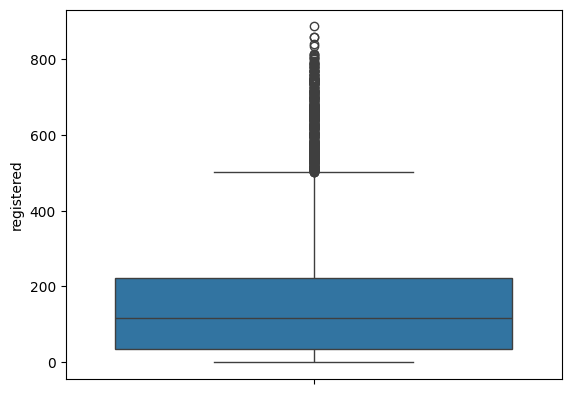

In [34]:
sns.boxplot(df["registered"])

<Axes: ylabel='casual'>

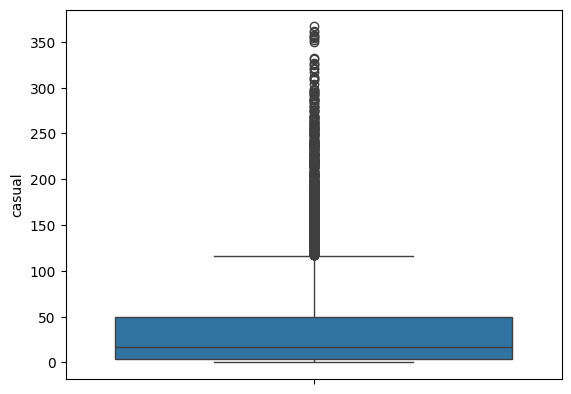

In [35]:
sns.boxplot(df["casual"])

<Axes: ylabel='count'>

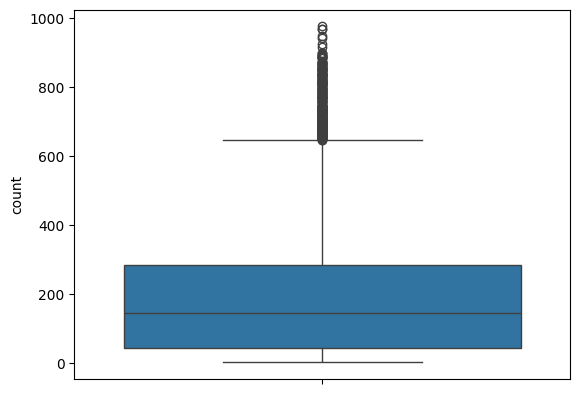

In [36]:
sns.boxplot(df["count"])

<Axes: xlabel='season', ylabel='count'>

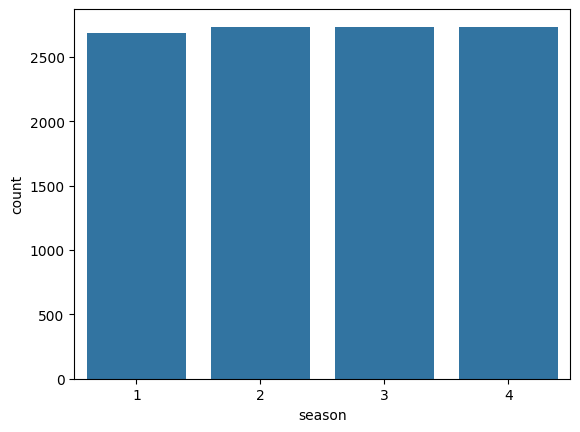

In [37]:
sns.countplot(data=df,x="season")

<Axes: xlabel='holiday', ylabel='count'>

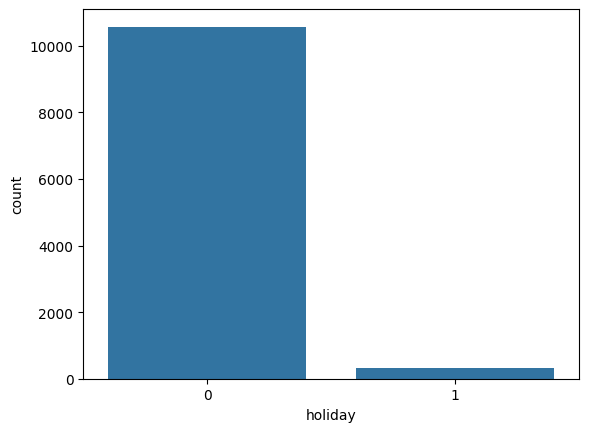

In [38]:
sns.countplot(data=df, x="holiday")

<Axes: xlabel='workingday', ylabel='count'>

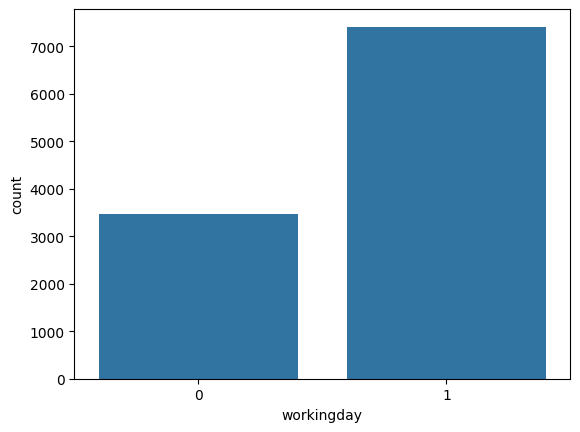

In [39]:
sns.countplot(data=df,x="workingday")

<Axes: xlabel='weather', ylabel='count'>

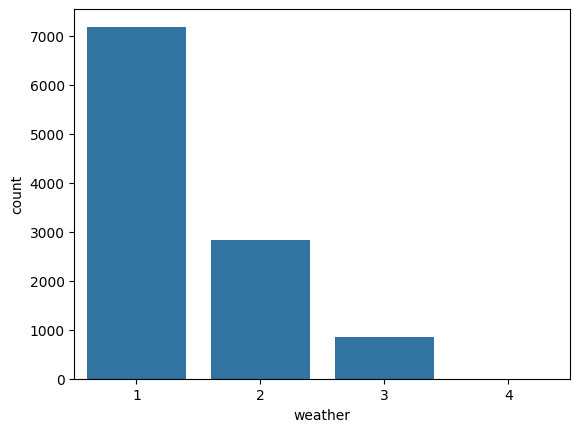

In [40]:
sns.countplot(data=df,x="weather")

Bivariate analysis

<Axes: xlabel='workingday', ylabel='count'>

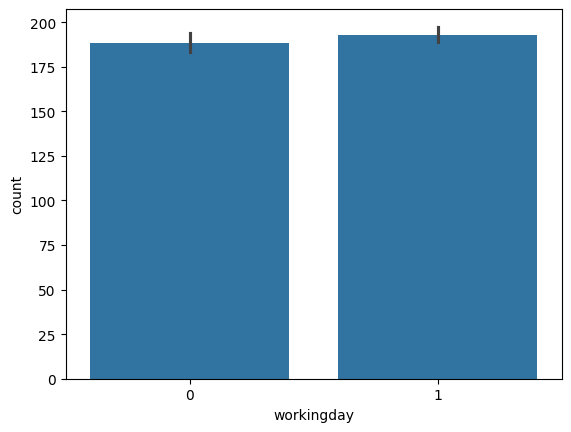

In [41]:
sns.barplot(data=df, x="workingday", y="count")

<Axes: xlabel='holiday', ylabel='count'>

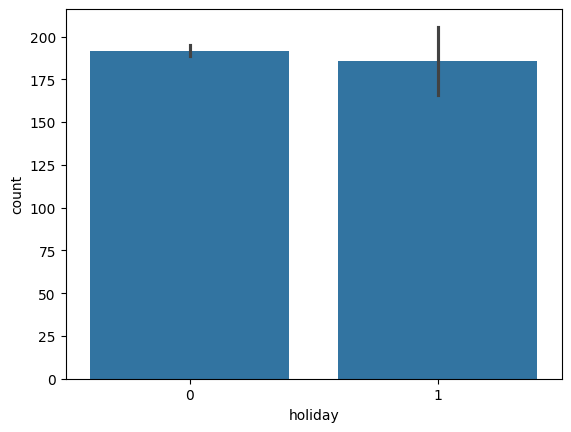

In [42]:
sns.barplot(data=df, x="holiday", y="count")

<Axes: xlabel='season', ylabel='count'>

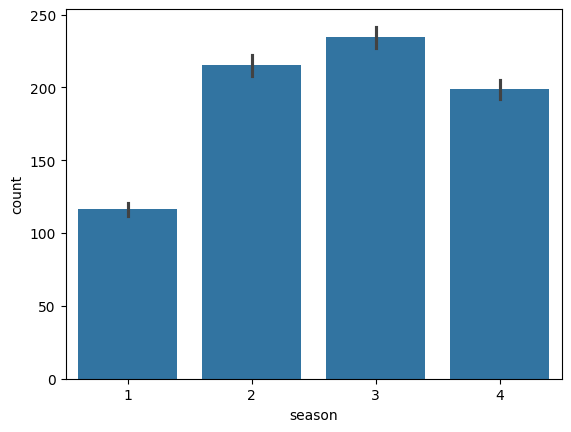

In [43]:
sns.barplot(data=df, x="season", y="count")

<Axes: xlabel='weather', ylabel='count'>

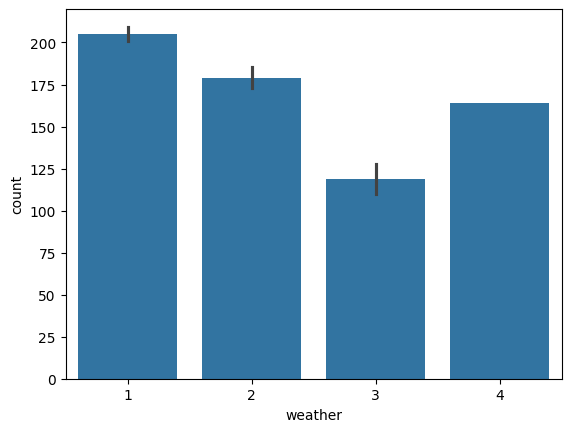

In [44]:
sns.barplot(df, x="weather",y="count")

<Axes: xlabel='humidity', ylabel='count'>

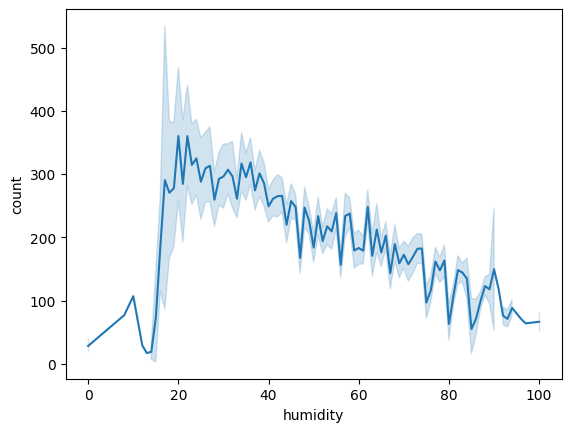

In [45]:
sns.lineplot(df, x="humidity",y="count")

<Axes: xlabel='weather', ylabel='count'>

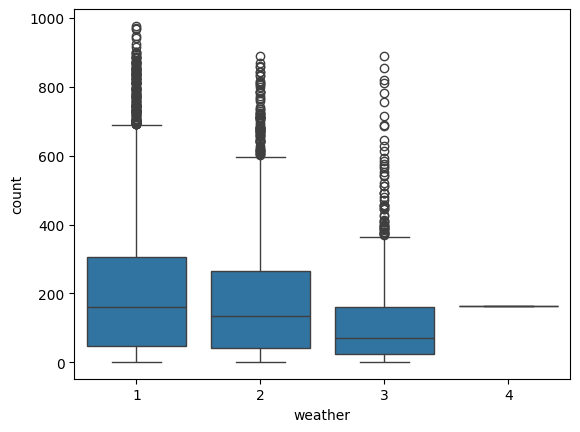

In [46]:
sns.boxplot(df, x="weather", y="count")

<Axes: xlabel='season', ylabel='count'>

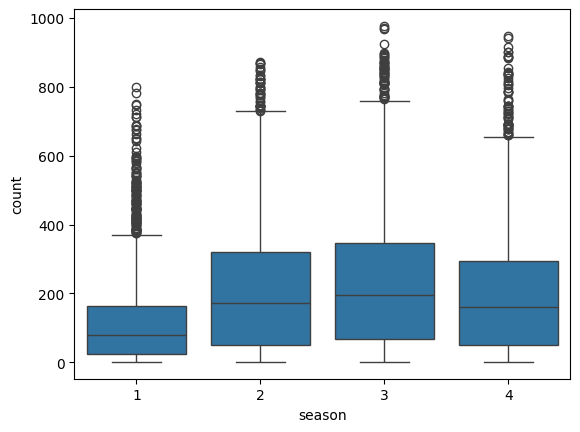

In [47]:
sns.boxplot(df,x="season", y="count")

<Axes: xlabel='workingday', ylabel='count'>

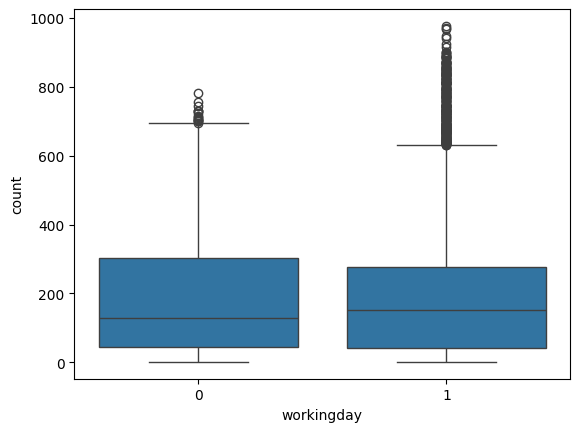

In [48]:
sns.boxplot(df,x="workingday", y="count")

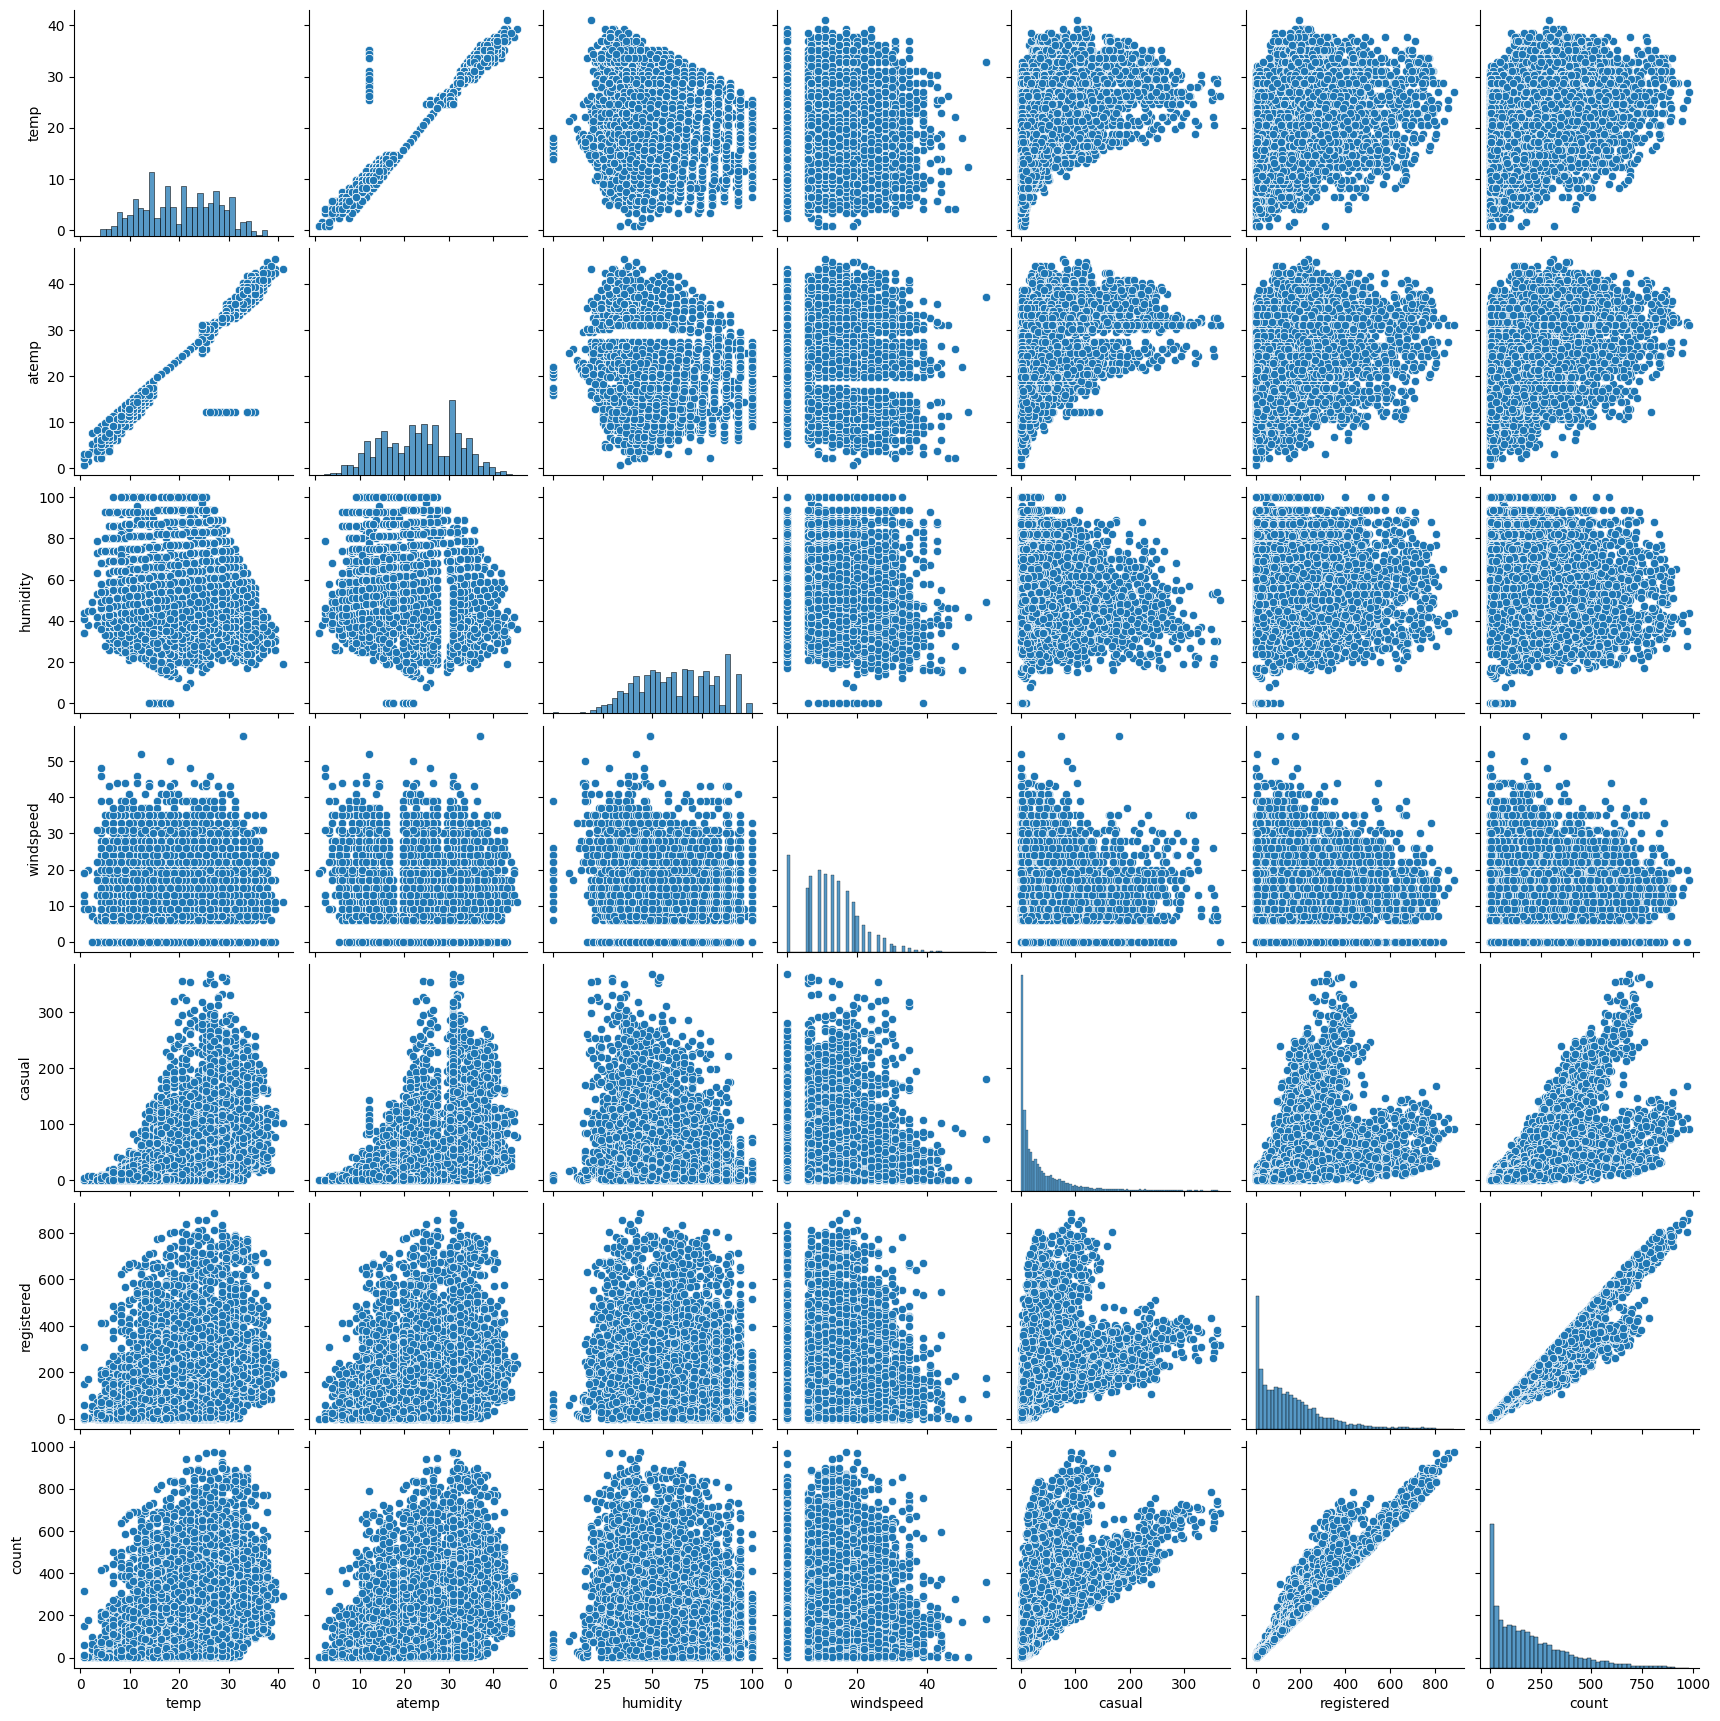

In [49]:
sns.pairplot(df.loc[:,"temp":])

In [52]:
df.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


<Axes: >

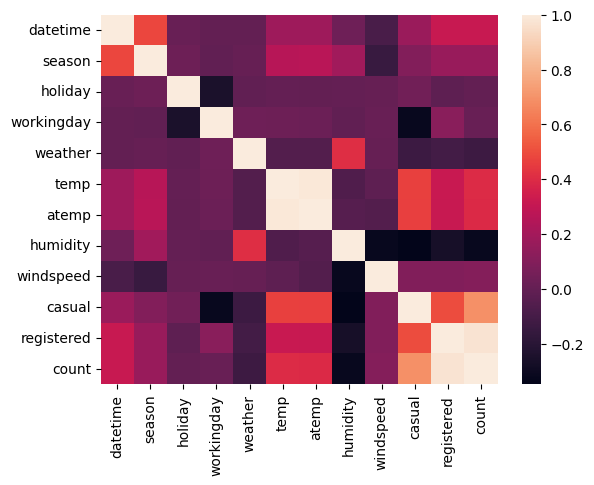

In [53]:
sns.heatmap(data=df.corr())

## Dataset Info

datetime: It contains the date and time respondence to the given data. It ranges from 2011-01-01 to 2012-12-19.

season: It contains 4 values of the season that are spring, summer, fall, and winter

holiday: It gives whether a given day is a holiday or not.

working day: It gives whether the given day is a working day or a holiday or weekend

weather: It contains 4 different masked categories of weather

temp: It gives the temperature in Celsius at that moment, and its value ranges from 0.82 to 41.00.

atemp: It gives the feeling temperature in Celsius at that moment, and its value ranges from 0.76 to 45.45.

humidity: It gives the humidity at a given time, and its value ranges from 0.0 to 100.00

windspeed: It gives the values of windspeed at a given time, and its value ranges from 0.0 to 56.99

casual: It gives a count of casual users at a given time, and its value ranges from 0 to 367

registered: It gives a count of casual users at a given time, and its value ranges from 0 to 886

count: It gives a count of total rental bikes including both casual and registered, and its value ranges from 1 to 977.

Here Outliers are found by IQR method in casual, registered, and count columns, but as dropping or morphing of outliers may affect our statistical significance, so Its better to keep them in our data.

## 2 Sample T-Test

In [56]:
working_day_count= df.loc[df["workingday"]==1,"count"]
non_working_day_count=df.loc[df["workingday"]==0,"count"]
working_day_count.mean(), working_day_count.std(), non_working_day_count.mean(), non_working_day_count.std()

(193.01187263896384, 184.5136590421483, 188.50662061024755, 173.72401532500032)

Ho : mean of working day and non working day is same : mu1 = mu2

Ha : mean of working day is higher than non working day : mu1 > mu2

Let us set siginificance level 0.05, confidence level 95%

In [57]:
alpha=0.05
#Let we do t-test for 2 samples and find test_statistics and p-value
test_statistic, p_value = ttest_ind(working_day_count,non_working_day_count, alternative="greater")
test_statistic, p_value

(1.2096277376026694, 0.11322402113180674)

Decision based on p-value and significance level

In [58]:
if p_value < alpha:
    print("Reject Null Hypothesis Ho")
else:
    print("Fail to Reject Null Hypothesis Ho")

Fail to Reject Null Hypothesis Ho


We have considered a confidence level of 95% in the Test.

The 2 Sample T-Test between the count attributes of the working day and the non-working day has been carried out and We found from the 2 Sample T-test that the means of both samples have no statistically significant difference.

##ANOVA TEST

In [60]:
weather_1 = df.loc[df["weather"]==1,"count"]
weather_2 = df.loc[df["weather"]==2,"count"]
weather_3 = df.loc[df["weather"]==3,"count"]
weather_4 = df.loc[df["weather"]==4,"count"]
weather_4

,count
5631,164


We will do shapiro Test for checking whether our sample follows Gaussian Distribution or not

Null and Alternate Hypothesis for Shapiro Test

H0: The sample follows Gaussian Distribution

Ha: The sample does not follow Gaussian Distribution

In [61]:
alpha=0.05
#p-value calculation
test_statistics, p_value = shapiro(weather_1)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


In [62]:
#p-value calculation
test_statistics, p_value = shapiro(weather_2)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [63]:
#p-value calculation
test_statistics, p_value = shapiro(weather_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


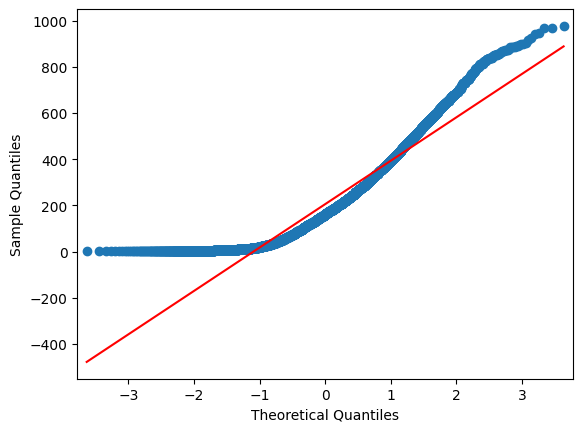

In [64]:
#Let's check for normality based on q-q plot
qqplot(weather_1,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

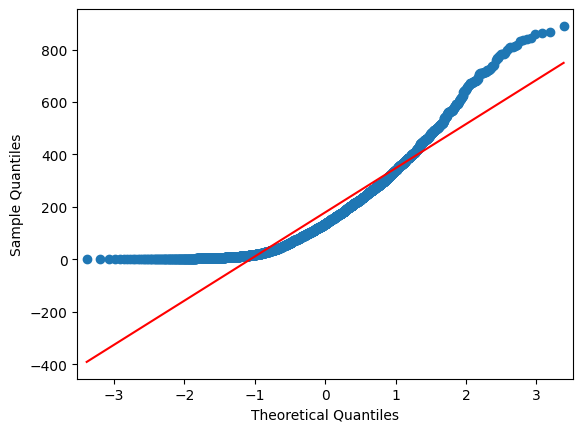

In [65]:
#Let's check for normality based on q-q plot
qqplot(weather_2,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

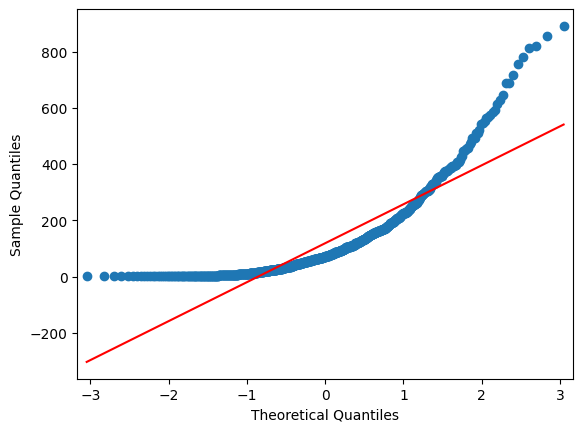

In [67]:
#Let's check for normality based on q-q plot
qqplot(weather_3,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

We will do levene test to check whether variance of the samples are same or not

Null Hypothesis and Alternate Hypothesis for Levene Test

H0: Variances of the samples are same

Ha: Variances of the samples are not same

In [68]:
alpha=0.05
#p-value calculation
test_statistics, p_value=levene(weather_1,weather_2, weather_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Variances of the samples are not same")
else:
    print("Fail to Reject Null Hypothesis, Variances of the samples are same")

p-value: 0.0
Reject Null Hypotheis, Variances of the samples are not same


As we have done shapiro and Q-Q Plot for checking Normality and Levene Test for checking Variance.

We have found that Samples do not follow Gaussian Distribution and do not have similar variance. So we will go for Kruskal-Wallis Test

Null and Alternate Hypothesis for Kruskal Wallis Test

H0: mean of total rental bikes of different weathers are same

Ha: mean of total rental bikes of different weathers are not same

In [69]:
alpha=0.05
#p-value calculation
test_statistics,p_value=kruskal(weather_1,weather_2,weather_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, mean of total rental bikes of different weathers are not same")
else:
    print("Fail to Reject Null Hypothesis, mean of total rental bikes of different weathers are same")

p-value: 0.0
Reject Null Hypotheis, mean of total rental bikes of different weathers are not same


In [70]:
#Filtering count based on weather category
season_1 = df.loc[df["season"]==1,"count"]
season_2 = df.loc[df["season"]==2,"count"]
season_3 = df.loc[df["season"]==3,"count"]
season_4 = df.loc[df["season"]==4,"count"]

We will do shapiro Test for checking whether our sample follows Gaussian Distribution or not

Null and Alternate Hypothesis for Shapiro Test

H0: The sample follows Gaussian Distribution

Ha: The sample does not follow Gaussian Distribution

In [71]:
alpha=0.05
#p-value calculation
test_statistics, p_value = shapiro(season_1)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [72]:
#p-value calculation
test_statistics, p_value = shapiro(season_2)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [73]:
#p-value calculation
test_statistics, p_value = shapiro(season_3)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


In [74]:
#p-value calculation
test_statistics, p_value = shapiro(season_4)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Sample does not follow Gaussian Distribution")
else:
    print("Fail to Reject Null Hypothesis, Sample follows Gaussian Distribution")

p-value: 0.0
Reject Null Hypotheis, Sample does not follow Gaussian Distribution


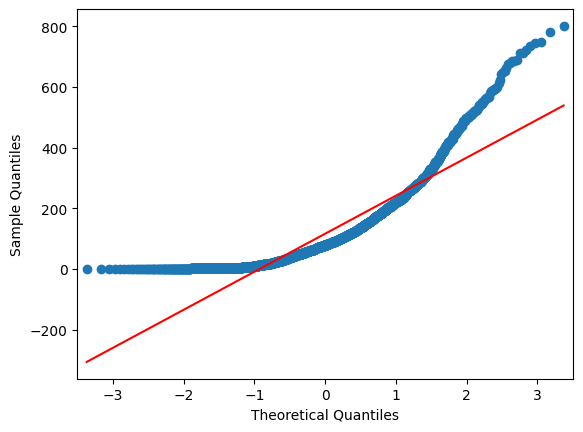

In [75]:
#Let's check for normality based on q-q plot
qqplot(season_1,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

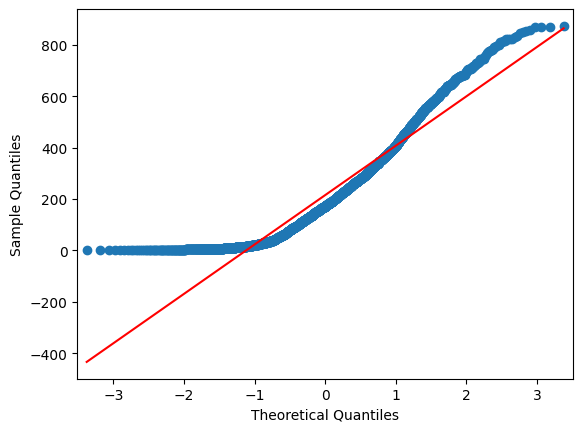

In [76]:
#Let's check for normality based on q-q plot
qqplot(season_2,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

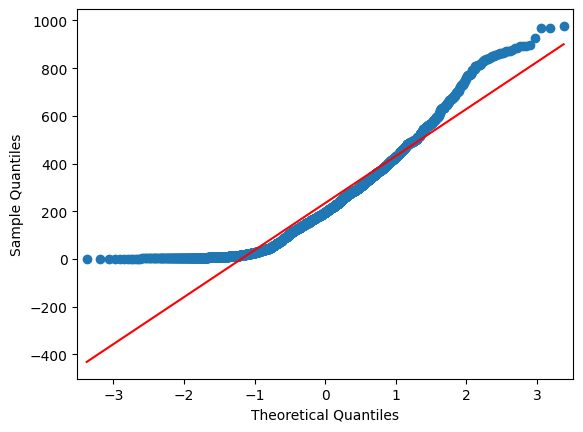

In [77]:
#Let's check for normality based on q-q plot
qqplot(season_3,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

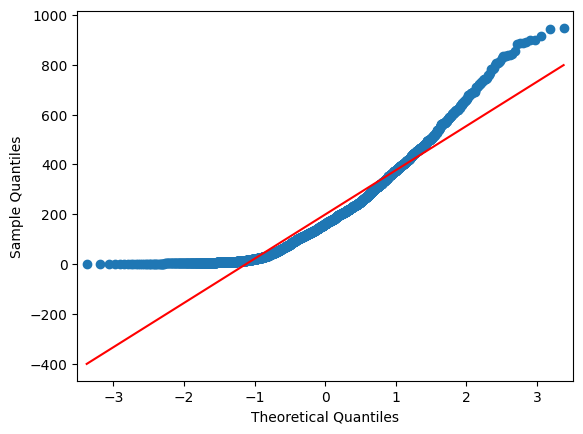

In [78]:
#Let's check for normality based on q-q plot
qqplot(season_4,line="s")
plt.show()
#Here Plot not matching with straight line so based on that we can say that sample does not follow normal distribution

We will do levene test to check whether variance of the samples are same or not

Null Hypothesis and Alternate Hypothesis for Levene Test

H0: Variances of the samples are same

Ha: Variances of the samples are not same

In [79]:
alpha=0.05
#p-value calculation
test_statistics, p_value=levene(season_1, season_2, season_3, season_4)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Variances of the samples are not same")
else:
    print("Fail to Reject Null Hypothesis, Variances of the samples are same")

p-value: 0.0
Reject Null Hypotheis, Variances of the samples are not same


As we have done shapiro and Q-Q Plot for checking Normality and Levene Test for checking Variance.

We have found that Samples do not follow Gaussian Distribution and do not have similar variance. So we will go for Kruskal-Wallis Test

Null and Alternate Hypothesis for Kruskal Wallis Test

H0: mean of total rental bikes of different seasons are same

Ha: mean of total rental bikes of different seasons are not same

In [80]:
#p-value calculation
test_statistics,p_value=kruskal(season_1, season_2, season_3, season_4)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, mean of total rental bikes of different seasons are not same")
else:
    print("Fail to Reject Null Hypothesis, mean of total rental bikes of different seasons are same")

p-value: 0.0
Reject Null Hypotheis, mean of total rental bikes of different seasons are not same


We have considered a confidence level of 95% in the Test.

For the assumptions testing like the shapiro-wilk test, q-q plot, and levene test has also been done in the Jupyter Notebook.

As samples fail for normality tests and variance tests, we have carried out Kruskal Wallis Test.

From the Kruskal Walis Test, It can be said that the Means of total rental bikes for different weathers has a statistically significant difference.

From the Kruskal Walis Test, It can be said that the Means of total rental bikes for different seasons has a statistically significant difference.

## Chi-square Test

In [81]:
#Creating Contingency table between categorical attributes weather and season
ws= pd.crosstab(df["weather"], df["season"])
ws

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [82]:
#Here in our contingency table there is value count of 1 and 0 for weather type 4
#we can not do chi-square test as minimum frequency to run chi-square test is 5
ws.loc[1:3,:]

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225


Here For Chi-Square Test between weather and Season

Null and Alternate Hypothesis

H0: Seasons and weather are independent

Ha: Seasons and weather are dependent on each other

In [83]:
alpha=0.05
test_statistics,p_value, dof, exp=chi2_contingency(ws)
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Seasons and weather are dependent on each other")
else:
    print("Fail to Reject Null Hypothesis, Seasons and weather are independent")

p-value: 0.0
Reject Null Hypotheis, Seasons and weather are dependent on each other


In [84]:
#p-value calculation
test_statistics,p_value, dof, exp=chi2_contingency(ws.loc[1:3,:])
print("p-value:", round(p_value,4))
if p_value < alpha:
    print("Reject Null Hypotheis, Seasons and weather are dependent on each other")
else:
    print("Fail to Reject Null Hypothesis, Seasons and weather are independent")

p-value: 0.0
Reject Null Hypotheis, Seasons and weather are dependent on each other


We have considered a confidence level of 95% in the Test.

From the Chi-Square Test, We can say that weather and season are depended on each other.

## Business Insights
Weather and seasons are dependent on each other.

Total rental bikes are depended on the weather. the mean value for the total rental bikes for the weather 1st category is high compared to others.

Total rental bikes are also depended on the seasons. the mean value for total rental bikes for fall is higher compared to other, during spring there is the lowest number of users.

There is no statistical difference in the mean of the total rental bikes on working days and non-working days

Most days in the city are of the weather of 1st category.

Temperature and total rental bikes are correlated and humidity and total rental bikes are negatively correlated.

casual users and total rental bikes are less correlated compared to registered users and total rental bikes.

## Recommendations

During spring, Yulu should provide some discounts and offers to increase the use of rental bikes.

During weather of rain, The mean of total rental bikes is lower than others. As Yulu provides bike services, customers can't use it in rainy times. so Yulu should provide some roofs or cab services during this weather.

As humidity increases the total number of rental bikes decreases, so, Yulu should provide benefits during these humid days.

Yulu can increase the use of rental bikes by providing some city tour offers, events, or campaigns during non-working days.

Yulu can convert its casual users to registered users by providing some discounts or registration offers to convert casual users to registered users.

As mostly there is clear weather, Yulu should focus on the increase in total rental bikes during clear weather days.